In [20]:
from src.neuropixel import Neuropixel
from pathlib import Path

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
HOME = Path('/media/internal/projects/Allen/Ecephys')
npx = Neuropixel(HOME)

/home/devxl/home_projects/NMA-rep-drift


In [4]:
pupil, run = npx.overall_pupil_run_average(60)

0it [00:00, ?it/s]

This ecephys session '715093703' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 715093703 has no eye tracing data!


1it [00:04,  4.22s/it]

This ecephys session '719161530' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 719161530 has no eye tracing data!


2it [00:08,  4.47s/it]

This ecephys session '721123822' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 721123822 has no eye tracing data!


3it [00:13,  4.53s/it]

This ecephys session '732592105' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 732592105 has no eye tracing data!


4it [00:17,  4.39s/it]

This ecephys session '737581020' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 737581020 has no eye tracing data!


5it [00:21,  4.27s/it]

This ecephys session '739448407' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 739448407 has no eye tracing data!


29it [02:24,  5.09s/it]

This ecephys session '768515987' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 768515987 has no eye tracing data!


56it [04:41,  4.78s/it]

This ecephys session '840012044' has no eye tracking data. (NWB error: "'raw_gaze_mapping' not found in processing of NWBFile 'root'.")
Session 840012044 has no eye tracing data!


58it [04:51,  5.02s/it]


In [5]:
pupil_norm = stats.zscore(pupil, axis=1, ddof=1, nan_policy='omit')
run_norm = stats.zscore(run, axis=1, ddof=1, nan_policy='omit')

In [6]:
# Calculate stats for each time point (column)
pupil_norm_mean = np.nanmean(pupil_norm, axis=0)
pupil_norm_sd = np.nanstd(pupil_norm, axis=0)
pupil_norm_err = pupil_norm_sd / np.sqrt(pupil_norm.shape[0])

run_norm_mean = np.nanmean(run_norm, axis=0)
run_norm_sd = np.nanstd(run_norm, axis=0)
run_norm_err = run_norm_sd / np.sqrt(run_norm.shape[0])

# Calculate stats for all
pupil_mean = np.nanmean(pupil, axis=0)
pupil_err = np.nanstd(pupil, axis=0) / np.sqrt(pupil.shape[0])

run_mean = np.nanmean(run, axis=0)
run_err = np.nanstd(run, axis=0) / np.sqrt(run.shape[0])

/home/devxl/miniconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/devxl/miniconda3/envs/neuro/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/devxl/miniconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/devxl/miniconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/home/devxl/miniconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [ ]:
pupil = np.load(str(npx.SAVE_DIR / "all_pupil_60s_bin.npy"))
run = np.load(str(npx.SAVE_DIR / "all_run_60s_bin.npy"))

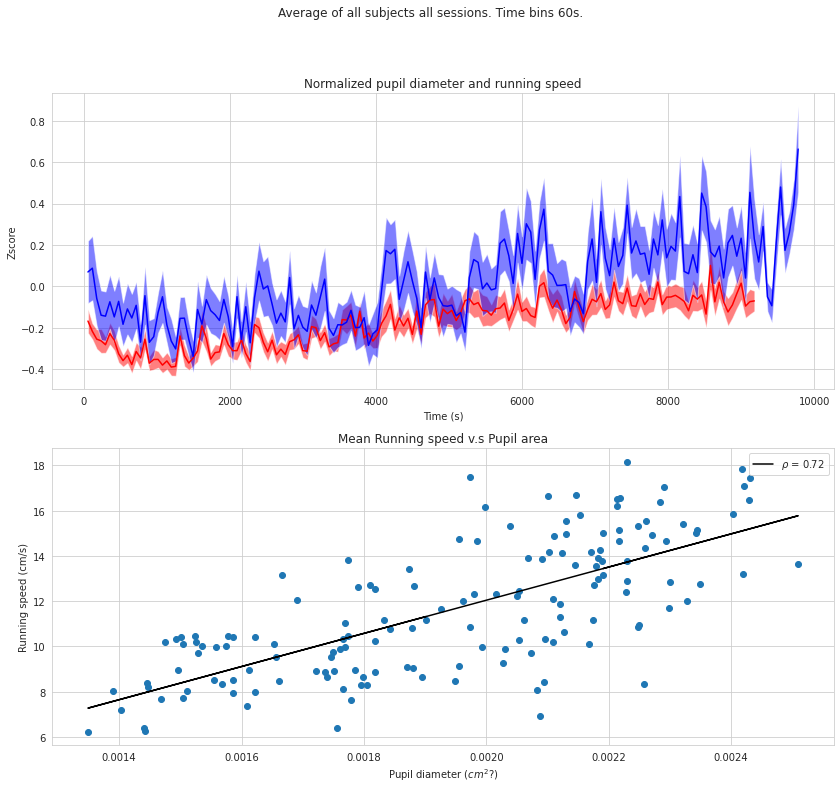

In [69]:
# Correlation between pupil size and running speed
# get timepoints to plot, pupil data is longer
time_bins = np.arange(0, 10000, 60)

# plot
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle(f"Average of all subjects all sessions. Time bins 60s.")

# plot against time
# Remove ridiculous outliers
pupil_norm_mean[pupil_norm_mean > 2] = np.nan
pupil_mean[pupil_mean > 0.01] = np.nan

axes[0].plot(time_bins, pupil_norm_mean, 'r-', label="Pupil area")
axes[0].plot(time_bins, run_norm_mean, 'b-', label="Running speed")
axes[0].fill_between(time_bins, pupil_norm_mean + pupil_norm_err, pupil_norm_mean - pupil_norm_err, alpha=0.5, facecolor='r')
axes[0].fill_between(time_bins, run_norm_mean + run_norm_err, run_norm_mean - run_norm_err, alpha=0.5, facecolor='b')
axes[0].set_title("Normalized pupil diameter and running speed")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Zscore")

# plot against each other
axes[1].scatter(pupil_mean, run_mean)
# axes[1].errorbar(pupil_mean, run_mean, yerr=run_err, xerr=pupil_err, errorevery=20, fmt='.')
# add regression line
mask = ~np.isnan(pupil_mean) & ~np.isnan(run_mean)
fit = LinearRegression().fit(pupil_mean[mask].reshape(-1, 1), run_mean[mask].reshape(-1, 1))
yy = fit.predict(pupil_mean[mask].reshape(-1, 1))
corr = np.corrcoef(pupil_mean[mask], run_mean[mask])
axes[1].plot(pupil_mean[mask], yy, 'k-', label=fr"$\rho$ = {np.round(corr[0][1], 2)}")

axes[1].set_title("Mean Running speed v.s Pupil area")
axes[1].set_xlabel("Pupil diameter ($cm^2$?)")
axes[1].set_ylabel("Running speed (cm/s)")

plt.legend()
plt.show()

fig.savefig(str(npx.FIG_DIR / "overall_running_pupil.png"))